Examples on how to work with nifti images via the help of the nibabel library

a good source of sample datasets is: http://www.informatik.uni-leipzig.de/~wiebel/public_data/

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import transforms3d
import itk
import itkwidgets 
from IPython.display import clear_output
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

import seaborn as sns
sns.set_style('darkgrid')

voxel size: (1.25, 1.25, 8.800003)
Unit sizes: ('mm', 'sec')
<class 'nibabel.nifti1.Nifti1Image'>
(320, 300, 54)


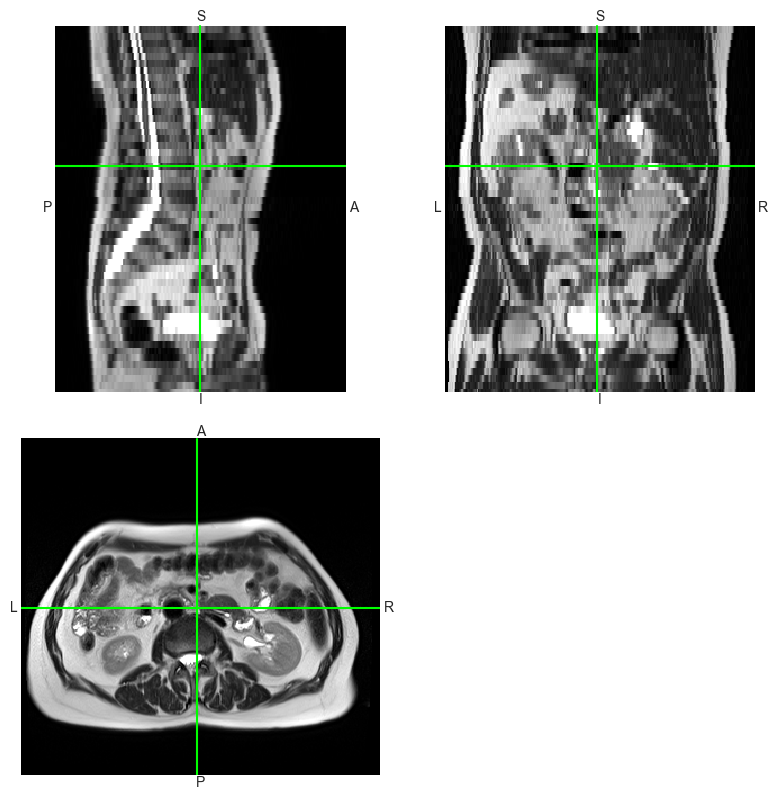

In [3]:
"""
Loading and examination of data 
"""

example_img = nib.load("./data/abdominal.nii")  # array proxy
hdr = example_img.header #contains meta information
print("voxel size:" , hdr.get_zooms())  # voxel size
print("Unit sizes:", hdr.get_xyzt_units())

print(type(example_img))
print(example_img.shape) # x,y,z, num_volumes

og_affine = example_img.affine
T, R, Z, S = transforms3d.affines.decompose(og_affine) # transformation, rotation, scaling/zoom, sheer

_ = example_img.orthoview()

In [4]:
""" Ways to extract data from array proxy """
kiki = example_img.dataobj[:,:,0] # acccess like this to avoic loading other data
example = example_img.get_fdata()  # load into ram
kiki.shape

(320, 300)

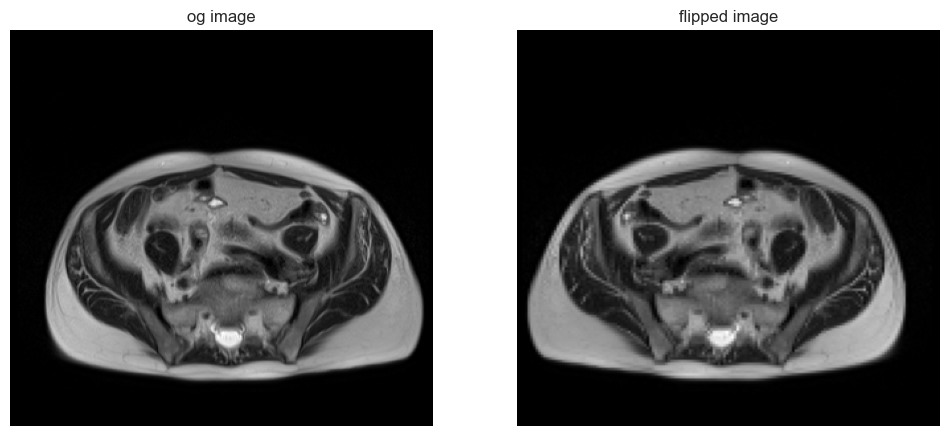

(320, 300, 14)

In [29]:
""" Plotting the Data and saving it back to a .nii file"""
og_img =example_img.dataobj[:,:,20].T  # OG
og_img_flipped = example_img.dataobj[::-1,:,20].T  # flip
og_img_flipped_small = og_img_flipped[::2,::2]  # downsize

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].imshow(og_img, cmap='gray', origin='lower')
ax[0].set_title("og image")
ax[0].axis('off')

ax[1].imshow(og_img_flipped_small, cmap='gray', origin='lower')
ax[1].set_title("flipped image")
ax[1].axis('off')


# plt.imshow(og_img_flipped, cmap='gray', origin='lower')
# plt.xlabel('first axis')
# plt.ylabel('second axis')
# plt.colorbar(label='Signal Intensity')
# plt.axis('off')  # turns grid off 
plt.show()

#select every forth slice 
test = example_img.dataobj[:, :, 0::4]
test.shape

## save back to nib
#nib.save(nib.Nifti1Image(test,affine=og_affine, header=hdr), "data/fourthslide.nii")

Type of image <class 'nibabel.nifti1.Nifti1Image'>
shape of data, height x width x depth x channel: (240, 240, 155, 4)


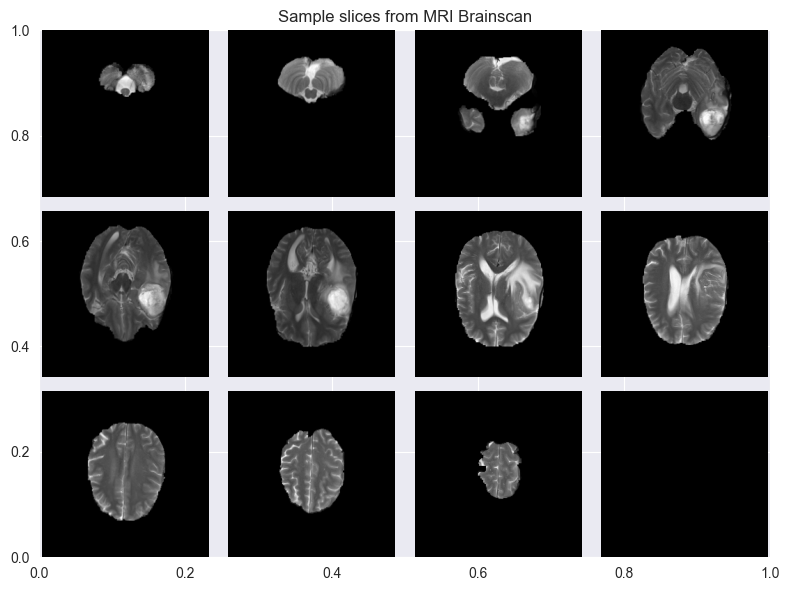

In [116]:
""" Example BRATS BRAIN TUMOR"""
clear_output()

img_path = "data/images/BRATS_001.nii.gz"
img_obj = nib.load(img_path)
print(f'Type of image {type(img_obj)}')

img_data = img_obj.get_fdata()
print(f"shape of data, height x width x depth x channel: {img_data.shape}")

#visualize data interactively

def explore_volume(layer):
    plt.figure(figsize=(8,12))
    channel =3
    plt.imshow(img_data[:,:,layer,channel], cmap='gray')
    plt.title("Exploring layers of Brain MRI")
    plt.axis('off')
    return layer

#interact(explore_volume, layer=(0, img_data.shape[2]-1))

# print multiple samples from one volume
fig = plt.figure(figsize=(8,6))
rows = 3
cols = 4
stepsize = np.floor(img_data.shape[2]/12).astype(int)

plt.title("Sample slices from MRI Brainscan")

for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    plt.grid('off')
    plt.axis('off')
    plt.imshow(img_data[:,:,i*stepsize, 3].T, cmap='gray')
    
plt.show()


The unique class labels are: [0. 1. 2. 3.]


Text(0.5, 1.0, 'Masks for the layer: 93')

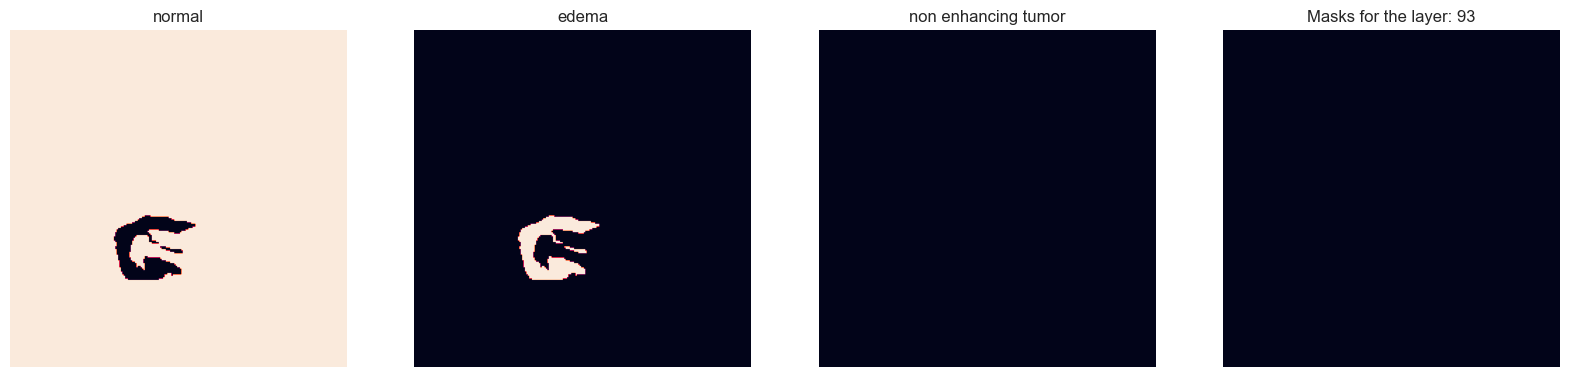

In [146]:
# display labels 

label_path = './data/labels/BRATS_001.nii.gz'
label_obj = nib.load(label_path)
label_mask = label_obj.get_fdata()

print(f"The unique class labels are: {np.unique(label_mask)}")

classes = {
    "normal": 0.,
    "edema" : 1.,
    "non enhancing tumor" : 2.,
    "enhancing tumor " : 3.,
}


layer = np.random.randint(30,label_mask.shape[2]-30)
list(classes.keys())[0]

fig, ax = plt.subplots(nrows =1, ncols = 4, figsize=(20,12))

for i in range(len(classes)):
    img_label_str = list(classes.keys())[i]
    mask = label_mask[:,:,layer]
    mask = np.where(mask == classes[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(img_label_str)
    ax[i].axis('off')

plt.title(f"Masks for the layer: {layer}")
